In [69]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model, model_selection, metrics, pipeline
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
df = pd.read_csv("/data/credit-default.csv")

In [71]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


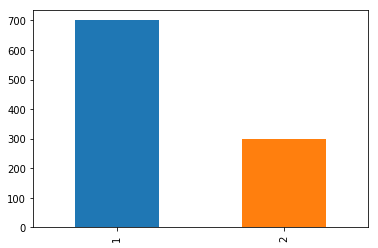

In [72]:
df.default.value_counts().plot.bar()

In [73]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [74]:
target = "default"
X = df.copy()
del X[target]
y = np.where(df[target] == 2, 1, 0)

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression())
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print(est.steps[-1][-1].coef_)

[[ 0.312818    0.44524518  0.49086746  0.10890534 -0.2880066   0.3079002
   0.11714795  0.18195057 -0.08142242 -0.5749465   0.29105841  0.42514838
   0.3337207   0.73250572  0.18738057 -0.43058567  0.01274016 -0.00280322
  -0.16861492 -0.12967034 -0.28655782  0.05732714 -0.12872286  0.06841528
   0.17669126 -0.3161011  -0.20575089 -0.03286388 -0.27588005 -0.11543802
   0.02534225 -0.17640648 -0.15684574 -0.47904412 -0.36407674 -0.20637507
  -0.03303847 -0.15464135  0.12350467 -0.26639548 -0.03639339  0.06726915
   0.22992616 -0.22814847  0.20477278 -0.0471206  -0.13272026  0.06920077]]


In [75]:
result = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})

In [76]:
result.head()

,actual,prediction
0,1,0
1,0,1
2,0,0
3,1,1
4,1,1


In [77]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[188,  26],
       [ 47,  39]])

In [78]:
from mlxtend.plotting import plot_confusion_matrix

(<matplotlib.figure.Figure at 0x1a230cf748>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a23598d68>)

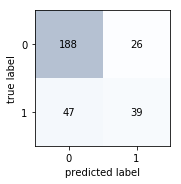

In [79]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [80]:
metrics.accuracy_score(y_test, y_test_pred)

0.7566666666666667

In [81]:
y_test_prob = est.predict_proba(X_test)[:,1]

In [82]:
y_test_prob

array([0.39057174, 0.93703644, 0.20657021, 0.61518513, 0.84263414,
       0.64645627, 0.4494791 , 0.2594988 , 0.07077182, 0.213155  ,
       0.82216781, 0.47922995, 0.10628614, 0.04927787, 0.37051886,
       0.40154836, 0.02384756, 0.08634611, 0.03673578, 0.8716225 ,
       0.17347053, 0.68418377, 0.08289624, 0.08335264, 0.20201892,
       0.14277761, 0.11199784, 0.22723868, 0.08939474, 0.8914261 ,
       0.3687219 , 0.03176349, 0.45735348, 0.21773117, 0.30430631,
       0.92027889, 0.24340843, 0.4961519 , 0.1303132 , 0.0819819 ,
       0.09401154, 0.58658622, 0.009761  , 0.49218681, 0.04921602,
       0.03568655, 0.10812248, 0.27239898, 0.0533497 , 0.10149276,
       0.22215534, 0.45281983, 0.59676824, 0.51534091, 0.22166303,
       0.1454495 , 0.58814834, 0.65672602, 0.02847046, 0.59138439,
       0.43687783, 0.07374869, 0.52003891, 0.01800186, 0.56258666,
       0.25013105, 0.18103621, 0.05744698, 0.8604261 , 0.93227089,
       0.16641523, 0.22303058, 0.03080095, 0.59138775, 0.14556

(<matplotlib.figure.Figure at 0x1a23563630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a235cb828>)

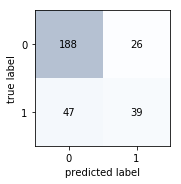

In [83]:
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [85]:
pd.DataFrame({"feature": X.columns, "coefficients": est.steps[-1][-1].coef_[0]})

,coefficients,feature
0,0.312818,months_loan_duration
1,0.445245,amount
2,0.490867,installment_rate
3,0.108905,residence_history
4,-0.288007,age
5,0.307900,existing_credits
6,0.117148,dependents
7,0.181951,checking_balance_< 0 DM
8,-0.081422,checking_balance_> 200 DM
9,-0.574947,checking_balance_unknown


Text(0.5,1,'ROC, auc: 0.758476')

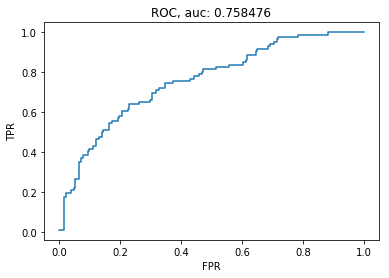

In [86]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_prob)

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: %f" % (metrics.auc(fpr, tpr)))

In [26]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


1. Build a model to predict the "Class" column based on V1 to V28.
2. Find baseline accuracy, model accuracy, precision and recall scores. 
3. What is the total number of misclassifications?
4. Which metric is most suitable in your opinion
5. For every false negative, bank would take a loss for the entire transaction amount. What is the total loss?

In [53]:
target = "Class"
X = df.iloc[:, 1:-1]
y = df[target]
#X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y, 
                                        test_size = 0.3, random_state = 1)

amount_test = X_test[:, -1]
X_train = X_train[:, :-1]
X_test = X_test[:, :-1]

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression(random_state=345))
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("Coefficient: ", est.steps[-1][-1].coef_)

print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred)
))

Coefficient:  [[ 0.08418826 -0.13033074  0.08114697  0.87631802  0.01817155 -0.1058825
  -0.07710303 -0.18171137 -0.48907443 -0.81781309 -0.00731398  0.15047279
  -0.36858738 -0.58134331 -0.01685408 -0.18040902 -0.02176842 -0.0064991
   0.04055692 -0.21406314  0.30621665  0.38201455 -0.06947558 -0.01341519
  -0.06466109  0.02704604 -0.31090815 -0.07316205]]
Accuracy: 0.999157
Precision: 0.577778
Recall: 0.838710


In [54]:
base_line_accuracy = np.max(y_train.value_counts()/len(y_train))
base_line_accuracy

0.9982093055917819

(<matplotlib.figure.Figure at 0x1a236daa58>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2309fcc0>)

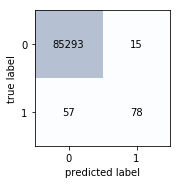

In [55]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [58]:
57 + 15

72

In [57]:
np.sum(amount_test[(y_test == 1) & (y_test_pred == 0)])

11529.029999999999

Accuracy: 0.999157
Precision: 0.577778
Recall: 0.838710


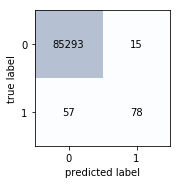

In [61]:
y_test_prob = est.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred)
))

If I increase the threshold to 0.8, will TP go up?

Accuracy: 0.999099
Precision: 0.511111
Recall: 0.862500


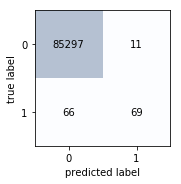

In [62]:
y_test_prob = est.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.8, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred)
))

Accuracy: 0.999181
Precision: 0.666667
Recall: 0.782609


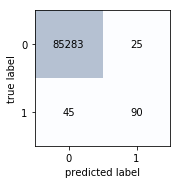

In [63]:
y_test_prob = est.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.2, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred)
))

f1_score = 2 * precision * recall/(precision + recall)

Text(0.5,1,'ROC, auc: 0.966718')

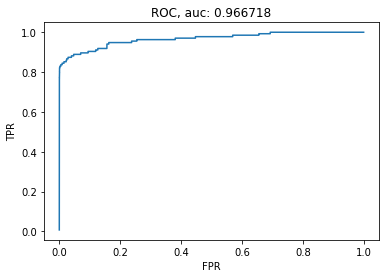

In [68]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_prob)

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: %f" % (metrics.auc(fpr, tpr)))